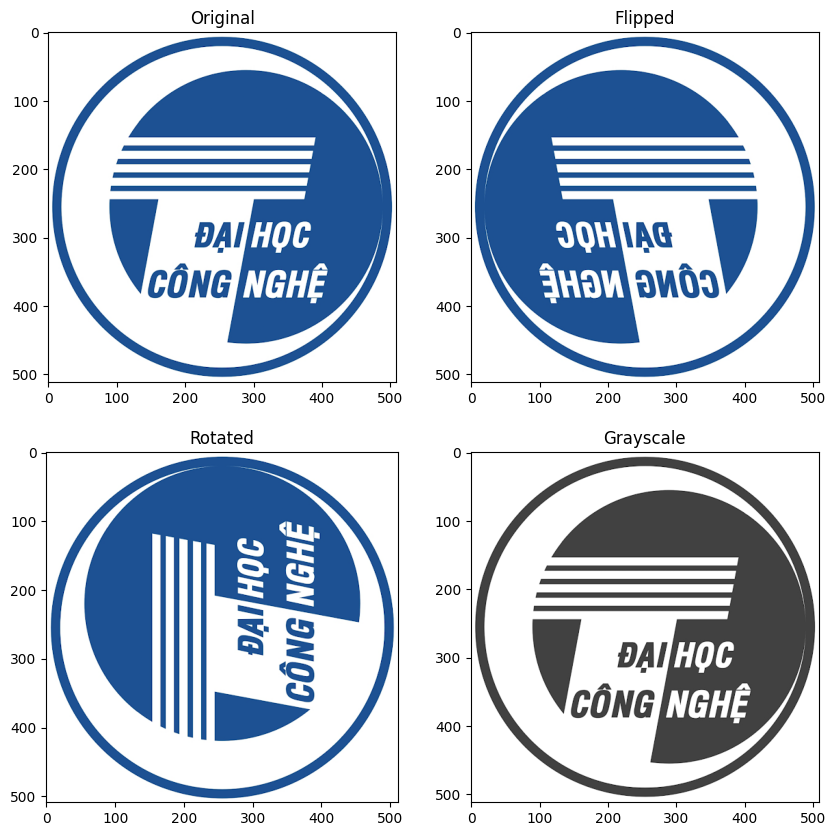

In [3]:
# -*- coding: utf-8 -*-
"""Untitled1.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/19SFVT4OKtAmUe8UXgBP4QTZHIAposyDL
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def flip_image(image, axis=0):
    """
    Flip an image along a given axis.
    axis=0: vertical flip
    axis=1: horizontal flip
    """
    return np.flip(image, axis=axis)

def rotate_image(image, angle):
    """
    Rotate an image at any angle.

    Parameters:
    - image: NumPy array, the image to be rotated.
    - angle: float, rotation angle in degrees. Positive values mean
      counter-clockwise rotation.

    Returns:
    - The rotated image as a NumPy array.
    """
    # Lấy chiều cao và chiều rộng của hình ảnh
    h, w = image.shape[:2]

    # Tính toán tâm của hình ảnh
    center = (w / 2, h / 2)

    # Tạo ma trận xoay sử dụng OpenCV để xác định tâm xoay và tỷ lệ hình ảnh
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Tính toán các góc mới của hình ảnh để xác định kích thước bao quanh cần thiết
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # Tính toán kích thước mới của hình ảnh
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    # Điều chỉnh ma trận xoay để tính đến việc dịch chuyển sau khi xoay
    M[0, 2] += (new_w / 2) - center[0]
    M[1, 2] += (new_h / 2) - center[1]

    # Thực hiện xoay với ma trận xoay đã được điều chỉnh
    rotated = cv2.warpAffine(image, M, (new_w, new_h))
    return rotated

def grayscale_image(image):
    """
    Convert an image to grayscale.
    """
    return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

# Load the image
image_path = 'uet.png'
image = mpimg.imread(image_path)

# Apply the functions
flipped_image = flip_image(image, axis=1)  # Horizontal flip
rotated_image = rotate_image(image, 90)    # Rotate 90 degrees
grayscale_image = grayscale_image(image)   # Convert to grayscale

# Display the original and manipulated images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(flipped_image)
plt.title('Flipped')

plt.subplot(2, 2, 3)
plt.imshow(rotated_image)
plt.title('Rotated')

plt.subplot(2, 2, 4)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale')

plt.show()